## Test fonction run exp

### 1. Imports

In [1]:
import torch
import stat_reliability_measure.config as config_
from importlib import reload
import matplotlib.pyplot as plt

In [2]:
import stat_reliability_measure.dev.torch_utils as t_u
import stat_reliability_measure.dev.torch_utils2 as t_u2
from stat_reliability_measure.dev.amls.amls_config import MLS_SMC_Config
import stat_reliability_measure.dev.utils as utils
import stat_reliability_measure.run_exp as run_exp
from stat_reliability_measure.config import ExpModelConfig
import stat_reliability_measure.dev.smc.smc_pyt as smc_pyt
import stat_reliability_measure.dev.smc.smc_pyt2 as smc_pyt2

import stat_reliability_measure.dev.smc.smc_config as smc_config
import stat_reliability_measure.dev.smc.smc_config2 as smc_config2

import stat_reliability_measure.dev.amls.amls_pyt as amls_pyt
import stat_reliability_measure.dev.form.form_pyt as form_pyt
import stat_reliability_measure.dev.amls.amls_config as amls_config 
import stat_reliability_measure.dev.mls.webb_config as webb_config
import stat_reliability_measure.dev.form.form_config as form_config
import stat_reliability_measure.dev.mls.amls_uniform as amls_webb
import stat_reliability_measure.dev.mc.mc_pyt as mc_pyt
import stat_reliability_measure.dev.mc.mc_config as mc_config
import stat_reliability_measure.dev.imp_sampling.is_pyt as is_pyt
import stat_reliability_measure.dev.imp_sampling.is_config as is_config
import stat_reliability_measure.dev.torch_arch as t_a
from stat_reliability_measure.dev.utils import range_vars,simple_vars
import pandas as pd
import numpy as np
import os 


### 2. Model & Data load

In [3]:
reload(config_)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#good seed : torch_seed = 111,np_seed = 0 

In [14]:
exp_config = config_.ExpModelConfig(dataset = 'imagenet', model_name = 'resnet18',data_dir = '../data/ImageNet', model_dir = '../models/ImageNet', device = device,
             torch_seed=111,np_seed=0,random_seed=0,shuffle=True,)
imagenet_simple_labels = t_u.get_imagenet_simple_labels()

In [15]:
exp_config.update()

os.rmdir(exp_config.exp_log_path)

In [16]:
exp_config.sample_accuracy

0.765625

In [17]:
exp_config.X.shape

torch.Size([49, 3, 224, 224])

Plotting 36 ImageNet pictures


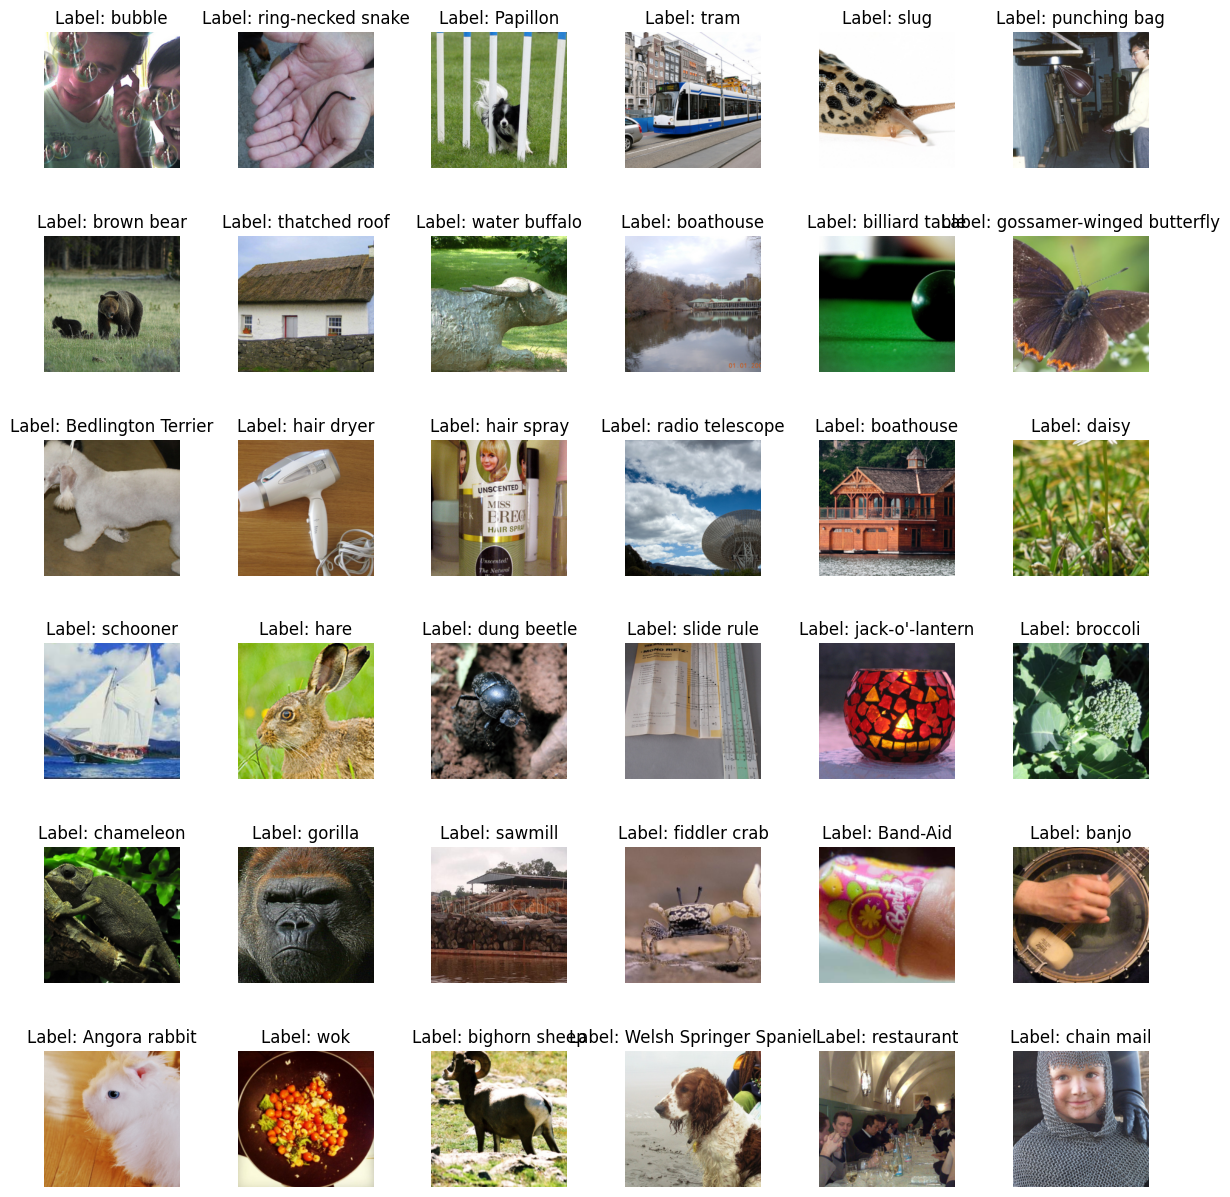

In [18]:
t_u.plot_imagenet_pictures(exp_config.X[:],exp_config.y[:],6)

## 3. Experiments with MALA-SMC, ours implementation and Webb's implementation of AMLS algorithm

In [15]:
epsilon_range=[0.18]
dataset='imagnet'
n_rep = 100 
method_ref='mala2'
method_ref_name='MALA_SMC'
N_ref = 4000
T_ref = 200
ess_ref = 0.8
alpha_ref = 0.2
n_rep_ref = 400

In [16]:
exp_config.X.requires_grad = True

In [18]:
x_0 = exp_config.X[0]

with parameters in {'N_range': [4000], 'T_range': [200], 'ess_alpha_range': [0.8], 'alpha_range': [0.2], 'L_range': [1]}
Starting MALA_SMC simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [03:49<00:00,  1.74it/s]


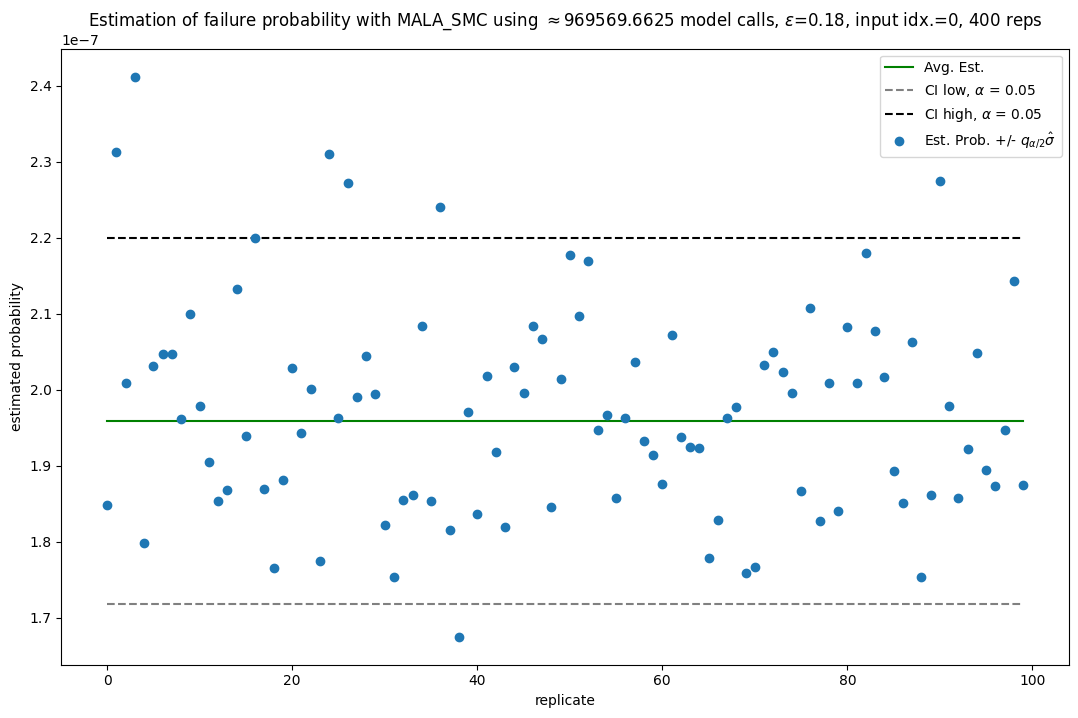

mean est:1.958998736029116e-07, std est:1.2279316238241379e-08
mean calls:969569.6625
std. re.:319967.503390415
std. rel. adj.:310230784273.2123


In [14]:
p_ref, dict_out = run_exp.run_est(model=model,X=X,y=y, 
                                                repeat_exp=True, track_dt=False,
                                             method='mala2', dataset_name=dataset,n_rep=n_rep_ref,
                                epsilon_range=epsilon_range, update_aggr_res=True ,track_accept=False,
                                N_range=[N_ref], T_range =[T_ref],ess_alpha = ess_ref,alpha=alpha_ref)

In [20]:
agg_res_df

,method_name,from_gaussian,N,rho,n_rep,T,epsilon,alpha,min_rate,mean_time,...,num_classes,model_name,nb_inputs,raw_logs_path,loc_time,exp_log_path,exp_id,rel_error,std_rel_error,p_ref
0,MALA_SMC,True,4000,NaN,100,200,0.18,0.25,0.15,0.402985,...,10.0,mnist_model,1.0,/home/karimtito/repos/stat_reliability_measure...,2023_11_14T11_50_34,/home/karimtito/repos/stat_reliability_measure...,0.0,NaN,NaN,NaN
1,MALA_SMC,True,50,NaN,100,5,0.18,0.20,0.15,0.157510,...,10.0,mnist_model,1.0,/home/karimtito/repos/stat_reliability_measure...,2023_11_14T11_54_07,/home/karimtito/repos/stat_reliability_measure...,1.0,0.329030,0.320454,2.376125e-07
2,MALA_SMC,True,50,NaN,100,10,0.18,0.20,0.15,0.210056,...,10.0,mnist_model,1.0,/home/karimtito/repos/stat_reliability_measure...,2023_11_14T11_54_07,/home/karimtito/repos/stat_reliability_measure...,2.0,0.348363,0.320178,2.376125e-07
3,MALA_SMC,True,500,NaN,100,20,0.18,0.20,0.15,0.215504,...,10.0,mnist_model,1.0,/home/karimtito/repos/stat_reliability_measure...,2023_11_14T11_55_25,/home/karimtito/repos/stat_reliability_measure...,3.0,0.126580,0.082009,2.376125e-07
4,MALA_SMC,True,4000,NaN,100,200,0.18,0.25,0.15,0.416483,...,10.0,mnist_model,1.0,/home/karimtito/repos/stat_reliability_measure...,2023_11_14T17_20_41,/home/karimtito/repos/stat_reliability_measure...,4.0,NaN,NaN,NaN
5,MALA_SMC,True,4000,NaN,100,200,0.18,0.25,0.15,0.411512,...,10.0,mnist_model,1.0,/home/karimtito/repos/stat_reliability_measure...,2023_11_14T17_46_05,/home/karimtito/repos/stat_reliability_measure...,5.0,NaN,NaN,NaN
6,MALA_SMC,True,4000,NaN,100,200,0.18,0.25,0.15,0.692112,...,10.0,mnist_model,1.0,/home/karimtito/repos/stat_reliability_measure...,2023_11_14T17_54_33,/home/karimtito/repos/stat_reliability_measure...,6.0,NaN,NaN,NaN
7,MALA_SMC,True,4000,NaN,100,200,0.18,0.25,0.15,0.758556,...,10.0,mnist_model,1.0,/home/karimtito/repos/stat_reliability_measure...,2023_11_14T17_57_19,/home/karimtito/repos/stat_reliability_measure...,7.0,NaN,NaN,NaN
8,MALA_SMC,True,500,NaN,100,20,0.18,0.20,0.15,0.223448,...,10.0,mnist_model,1.0,/home/karimtito/repos/stat_reliability_measure...,2023_11_14T18_00_19,/home/karimtito/repos/stat_reliability_measure...,8.0,0.141853,0.108435,1.937714e-07
9,MALA_SMC,True,4000,NaN,100,200,0.18,0.25,0.15,0.708665,...,10.0,mnist_model,1.0,/home/karimtito/repos/stat_reliability_measure...,2023_11_14T20_13_07,/home/karimtito/repos/stat_reliability_measure...,9.0,NaN,NaN,NaN


In [19]:
agg_res_df = pd.read_csv('../logs/exp_model_mnist/aggr_res.csv')
ref_exp = utils.get_sel_df(df=agg_res_df, triplets=[('method_name',method_ref,'='),('n_rep',n_rep_ref,'='),
                                                    ('epsilon',epsilon_range[0],'='),
        ('N',N_ref,'='),('T',T_ref,'='),('alpha',alpha_ref,'='), ])
p_ref,std_ref =ref_exp['mean_est'].values[0], ref_exp['std_est'].values[0]
p_ref,std_ref

IndexError: index 0 is out of bounds for axis 0 with size 0

In [76]:
reload(amls_config)
reload(config_)
reload(webb_config)
reload(amls_webb)
reload(amls_pyt)
reload(smc_pyt)
reload(smc_pyt2)
reload(smc_config2)
reload(t_u2)
reload(run_exp)
reload(form_config)
reload(t_u)
reload(form_pyt)
reload(is_pyt)
reload(is_config)
reload(mc_config)
reload(mc_pyt)

<module 'stat_reliability_measure.dev.mc.mc_pyt' from '/home/karimtito/repos/stat_reliability_measure/dev/mc/mc_pyt.py'>

with parameters in {'N_range': [500], 'T_range': [20], 'ess_alpha_range': [0.8], 'alpha_range': [0.2], 'L_range': [1]}
Starting MALA_SMC simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 100/100 [00:43<00:00,  2.30it/s]


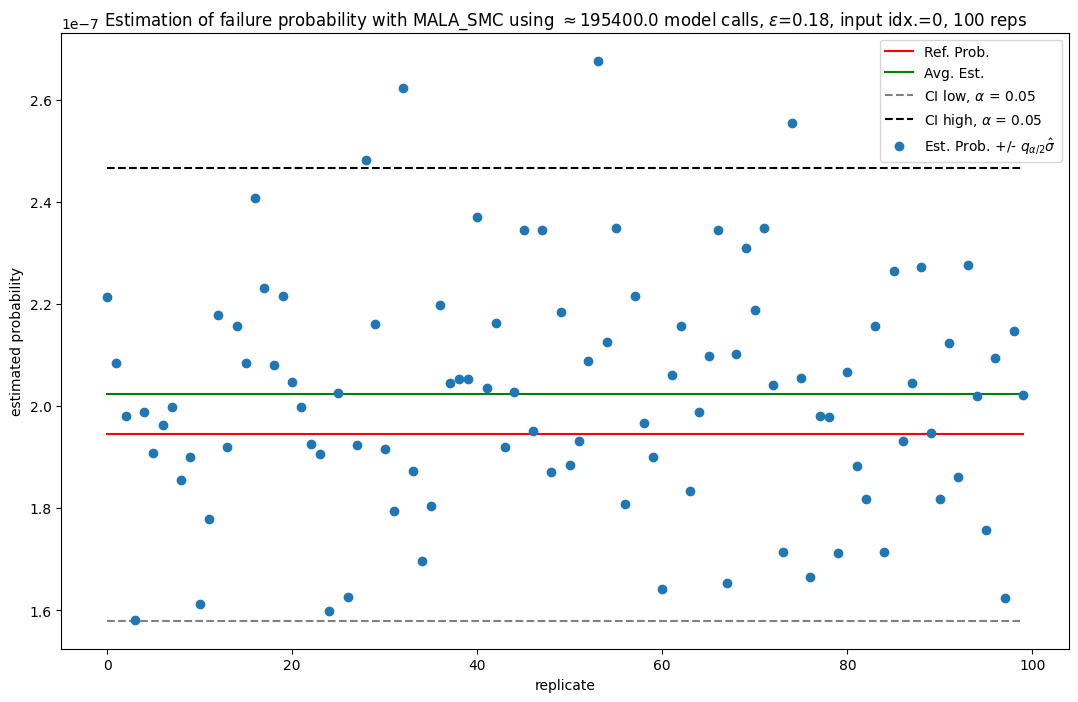

mean est:2.0228463768035e-07, std est:2.2620643212955117e-08
mean calls:195400.0
std. re.:552814.1437985906
std. rel. adj.:108019883698.24461
mean rel. error:0.09572993421661753
std rel. error:0.07736820461971772
stat performance (per 1k calls):15.117747182692842
p_fail_mala=2.0228463768035e-07


In [15]:
p_fail_mala, dict_out=run_exp.run_est(model=model,method='mala2',X=X,y=y,dataset_name='mnist',
                        n_rep=100, verbose=0, track_accept=False,ess_alpha_range=[0.8],
                        alpha=0.2, L_range=[1], only_duplicated=False,p_ref=p_ref,
                         N_range=[500],T_range=[20],epsilon_range=epsilon_range,repeat_exp=True,
 )


exp_config,method_config_mala, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mala = dict_out['results_df']
print(f"p_fail_mala={p_fail_mala}")

In [22]:
p_fail_webb,dict_out=run_exp.run_est(model=model,method='amls_webb',X=X,y=y,dataset_name=dataset,
                        epsilon_range=epsilon_range, n_rep=100, update_aggr_res=False,
                         N_range=[300],T_range=[1000,],ratio_range=[0.5,],repeat_exp=False,
                        verbose=1,np_seed=0, torch_seed=0 ,)
exp_config,method_config_webb, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_webb=dict_out['results_df']
print(f"p_fail_webb={p_fail_webb}")

model accuracy on sample batch:1.0
Running reliability experiments on architecture custom trained on mnist.
Testing uniform noise pertubation with epsilon in [0.18]
ModelExperimentConfig configuration: 
 config( adversarial_every=1, aggr_res_path=/home/karimtito/repos/stat_reliability_measure/logs/exp_model_mnist/aggr_res.csv, allow_multi_gpu=True, attack=PGD, clip_max=1_0, clip_min=0_0, commit=15d53c4d0e4f3b0d0b70b9248b4174ba83c9e854, data_dir=/home/karimtito/repos/stat_reliability_measure/data, dataset=mnist, device=cuda:0, download=True, eps_max=0_18, eps_min=0_18, eps_num=1, epsilon=0_18, exp_log_path=/home/karimtito/repos/stat_reliability_measure/logs/exp_model_mnist/raw_logs/MLS_Webb/MLS_Webb_2023_11_14T11_56_11, exp_name=, export_to_onnx=False, force_train=False, from_gaussian=True, input_start=0, input_stop=1, lirpa_bounds=False, lirpa_cert=False, load_batch_size=128, loc_time=2023_11_14T11_56_11, log_dir=/home/karimtito/repos/stat_reliability_measure/logs/exp_model_mnist, log_

  0%|          | 0/100 [00:00<?, ?it/s]

TypeError: multilevel_uniform() got an unexpected keyword argument 'V'

with parameters in {'N_range': [10000], 'T_range': [5], 'ratio_range': [0.5], 's_range': [1.0]}
Starting MLS_SMC simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:33<00:00,  5.97it/s]


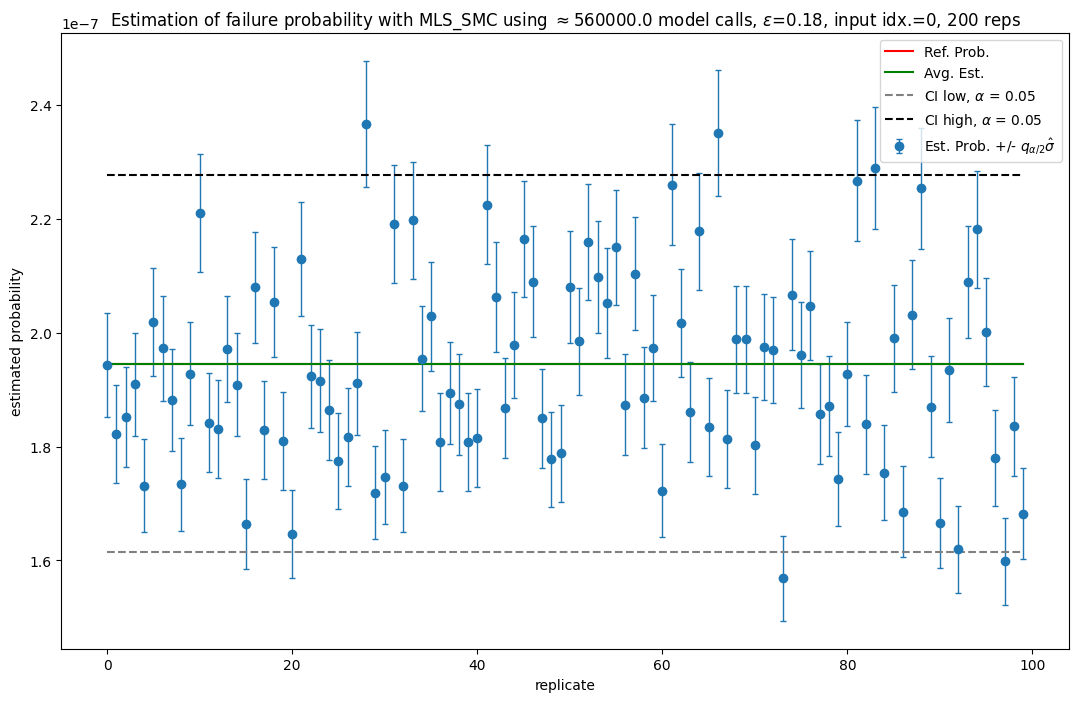

mean est:1.9455361366271972e-07, std est:1.6888154683265713e-08
mean calls:560000.0
std. re.:446173.317313993
std. rel. adj.:249857057695.8361
mean rel. error:0.07145286651437344
std rel. error:0.049365267627940856
stat performance (per 1k calls):27.64454987164688
p_fail_mls: 1.9455361366271972e-07


In [72]:
p_fail_mls,dict_out=run_exp.run_est(model=model,method='amls_batch',X=X,y=y,dataset_name=dataset,
                        epsilon_range=epsilon_range, n_rep=200, update_aggr_res=False, 
                         N_range=[10000, 
                                  ],T_range=[5],ratio_range=[0.5,],repeat_exp=False,
                        verbose=0,np_seed=0, torch_seed=0,p_ref = p_ref)
exp_config,method_config_mls, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mls = dict_out['results_df']
print(f"p_fail_mls: {p_fail_mls}")

with parameters in {'N_range': [80000], 'batch_size_range': [8000]}
Starting IS simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 300/300 [00:19<00:00, 15.31it/s]


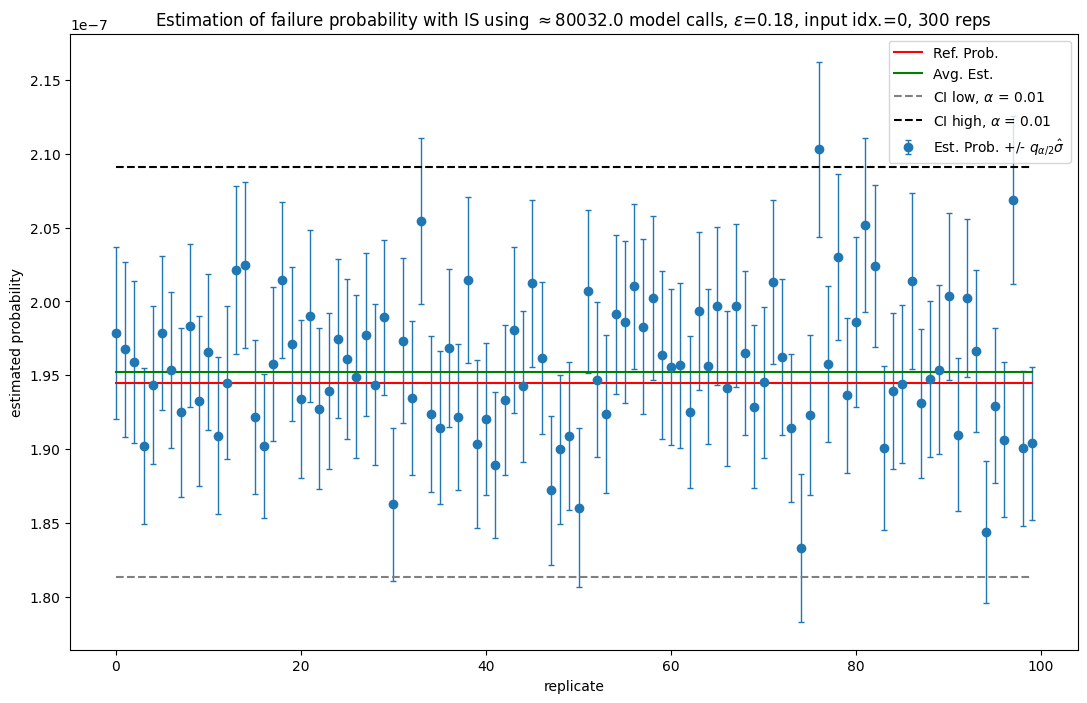

mean est:1.95222341403678e-07, std est:5.398058444683329e-09
mean calls:80032.0
std. re.:141637.5963433441
std. rel. adj.:11335540110.550516
mean rel. error:0.022158237174153328
std rel. error:0.017172710970044136
stat performance (per 1k calls):1.3743664043545722
p_fail_mls: 1.95222341403678e-07


In [70]:
p_fail_mls,dict_out=run_exp.run_est(model=model,method='is',X=X,y=y,dataset_name=dataset,
                        epsilon_range=epsilon_range, n_rep=300, update_aggr_res=False, 
                         N_range=[80000,],batch_size_range=[8000],repeat_exp=False,alpha_CI=0.01,
                        verbose=0,np_seed=0, torch_seed=0,p_ref = p_ref,sigma_bias=1.)
exp_config,method_config_mls, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mls = dict_out['results_df']
print(f"p_fail_mls: {p_fail_mls}")

with parameters in {'N_range': [80000], 'batch_size_range': [8000]}
Starting IS simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


  0%|          | 0/300 [00:00<?, ?it/s]

100%|██████████| 300/300 [00:20<00:00, 14.88it/s]


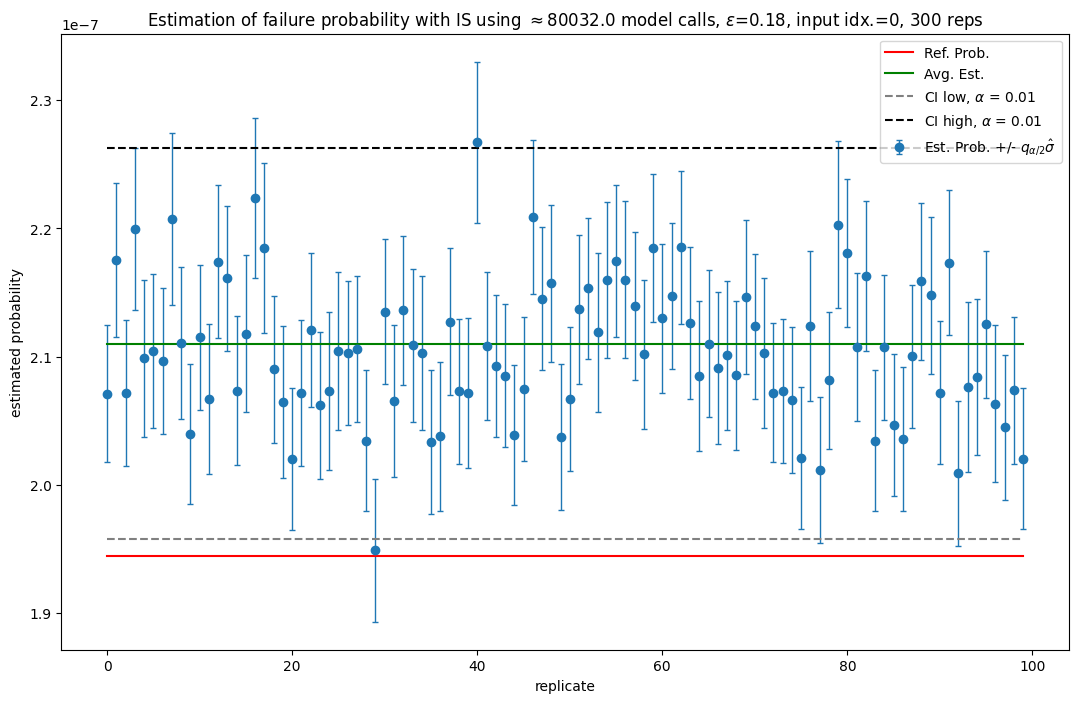

mean est:2.1102624714330886e-07, std est:5.904406297219111e-09
mean calls:80032.0
std. re.:132587.7142317333
std. rel. adj.:10611259945.39408
mean rel. error:0.08518485724925995
std rel. error:0.030362918972969055
stat performance (per 1k calls):2.430005131244659
p_fail_mls: 2.1102624714330886e-07


In [69]:
p_fail_mls,dict_out=run_exp.run_est(model=model,method='is',X=X,y=y,dataset_name=dataset,
                        epsilon_range=epsilon_range, n_rep=300, update_aggr_res=False, 
                         N_range=[80000,],batch_size_range=[8000],repeat_exp=False,alpha_CI=0.01,
                        verbose=0,np_seed=0, torch_seed=0,p_ref = p_ref,sigma_bias=1.)
exp_config,method_config_mls, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mls = dict_out['results_df']
print(f"p_fail_mls: {p_fail_mls}")

In [ ]:
p_fail_mala, dict_out=run_exp.run_stat_rel_exp(model=model,method='mala',X=X,y=y,dataset_name='mnist',
                        n_rep=1, verbose=0, track_accept=False,ess_alpha_range=[0.7,0.8],
                        alpha=0.2, L_range=[1], adapt_func='simp_ess',p_ref=p_ref,
                         N_range=[3000],T_range=[20],epsilon_range=epsilon_range,repeat_exp=True,
 )
exp_config,method_config_mala, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mala = dict_out['results_df']
print(f"p_fail_mala={p_fail_mala}")

[[3000], [20], [0.7, 0.8], [0.2], [1]]
{'N_range': [3000], 'T_range': [20], 'ess_alpha_range': [0.7, 0.8], 'alpha_range': [0.2], 'L_range': [1]}
Starting MALA_SMC simulation 1/2, with model: mnist_model, img_idx:0,eps:0.18,N: 3000: T: 20: ess_alpha: 0.7: alpha: 0.2: L: 1


100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


mean est:7.125619845282927e-07, std est:0.0
mean calls:1806200.0
std. re.:0.0
std. rel. adj.:0.0
Starting MALA_SMC simulation 2/2, with model: mnist_model, img_idx:0,eps:0.18,N: 3000: T: 20: ess_alpha: 0.8: alpha: 0.2: L: 1


100%|██████████| 1/1 [00:03<00:00,  3.41s/it]


mean est:1.429374947292672e-06, std est:0.0
mean calls:1792200.0
std. re.:0.0
std. rel. adj.:0.0
p_fail_mala=1.0709684659104823e-06


with parameters in {'N_range': [500], 'T_range': [20], 'ess_alpha_range': [0.875], 'alpha_range': [0.2], 'L_range': [1]}
Starting MALA_SMC simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


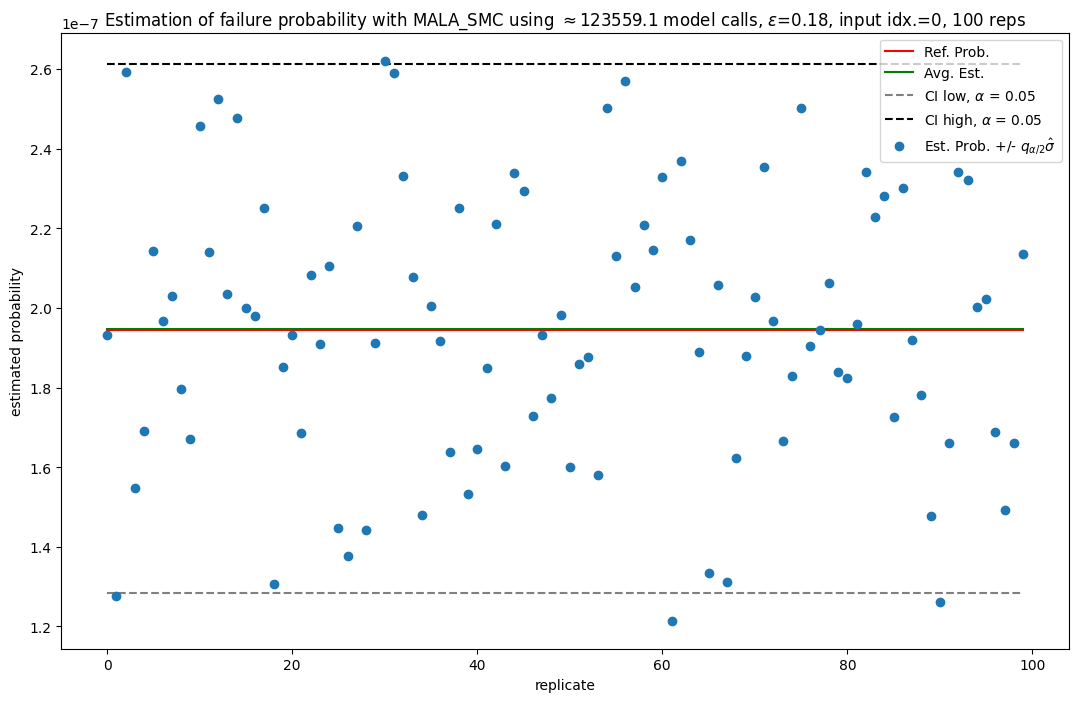

mean est:1.947763398391089e-07, std est:3.3910787382815905e-08
mean calls:123559.1
std. re.:893851.7050677764
std. rel. adj.:110443512211.6399
mean rel. error:0.14067106655076209
std rel. error:0.10307205941389559
stat performance (per 1k calls):12.735490896327468
p_fail_mala=1.947763398391089e-07


In [83]:
p_fail_mala, dict_out=run_exp.run_est(model=model,method='mala2',X=X,y=y,dataset_name='mnist',
                        n_rep=100, verbose=0, track_accept=False,ess_alpha_range=[0.875],
                        alpha=0.2, L_range=[1], adapt_func='simp_ess',p_ref=p_ref,
                         N_range=[500],T_range=[20],epsilon_range=epsilon_range,repeat_exp=True,
 )
exp_config,method_config_mala, agg_res_df = dict_out['exp_config'],dict_out['method_config'],dict_out['agg_res_df']
results_df_mala = dict_out['results_df']
print(f"p_fail_mala={p_fail_mala}")

In [ ]:
exp_config.model(X)

tensor([[  0.4927,  -4.5988,   2.9991,   5.6759,  -6.5458,   0.6176, -10.5810,
          11.0179,   0.7859,   1.3639]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [14]:
model(X)

tensor([[  0.4927,  -4.5988,   2.9991,   5.6759,  -6.5458,   0.6176, -10.5810,
          11.0179,   0.7859,   1.3639]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [50]:
1125858/5e7

0.02251716

In [51]:
p_fail_form,dict_out_form = run_exp.run_stat_rel_exp(model=model,method='form',X=X,y=y,dataset_name='mnist',
                    search_method='carlini',epsilon_range = epsilon_range,
                    steps_range=[1000,],num_iter_range=[10],stepsize_range=[1e-2],
                    repeat_exp=True, random_init=False, 
                    sigma_init=0.000001,
                        
                        
                        n_rep=1, verbose=0,p_ref=p_ref)

[[1000], [10], [0.01]]
{'steps_range': [1000], 'num_iter_range': [10], 'stepsize_range': [0.01]}
Starting FORM simulation 1/1, with model: mnist_model, img_idx:0,eps:0.2,steps: 1000: num_iter: 10: stepsize: 0.01


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:19<00:00, 19.32s/it]


mean est:2.9287436643461935e-10, std est:0.0
mean calls:10000.0
std. re.:0.0
std. rel. adj.:0.0
mean rel. error:0.9999991309993812
std rel. error:0.0
stat performance (per 1k calls):0.0


In [78]:
p_fail_mc, dict_out_mc = run_exp.run_est(model=model, method = 'CrudeMC',
            X=X, y=y, dataset_name='mnist',epsilon_range=epsilon_range,
            repeat_exp=True,n_rep=5, 
            N_range=[int(1e8)],batch_size_range=[int(4e5)],track_advs=False) 

with parameters in {'N_range': [100000000], 'batch_size_range': [400000]}
Starting CrudeMC simulation 1/1, with model: mnist_model, img_idx:0,eps:0.18,


 20%|██        | 1/5 [00:34<02:16, 34.19s/it]


KeyboardInterrupt: 

In [53]:
exp_config.model

dnn2(
  (linear1): Linear(in_features=784, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (flat_op): Flatten()
)

## 4. Analysis of Experiments

In [65]:
eps=0.18

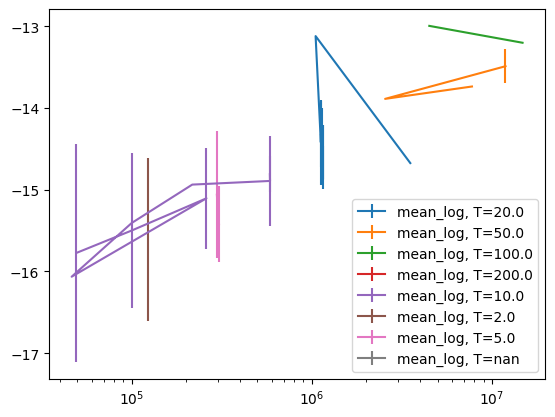

In [68]:
fig=plt.figure()
ax=plt.axes()
ax.set_xscale('log')
mls_webb_df=  utils.get_sel_df(df=agg_res_df,triplets=[('method_name','MALA_SMC','='),])
for T in agg_res_df['T'].unique():
    df = utils.get_sel_df(mls_webb_df,triplets=[('T',T,'='),('epsilon',eps,'=')])
    ax.errorbar(x=df['mean_calls'],y=df['mean_log_est'], yerr=df['std_log_est'],label=f'mean_log, T={T}',)
    ax.legend()

